##Importing Data

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
data=sns.load_dataset('iris')

In [ ]:
data.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [ ]:
sepal_length=np.array(data.sepal_length)
sepal_width=np.array(data.sepal_width)
petal_length=np.array(data.petal_length)
petal_width=np.array(data.petal_width)

In [ ]:
attribute_array=data.columns.tolist()

In [ ]:
species=data['species'].unique()
print(species)

['setosa' 'versicolor' 'virginica']


In [ ]:
np_data=data[['sepal_length','sepal_width','petal_length','petal_width']].to_numpy()

##  Question 1. Estimate the covariance matrix of the 4 attributes.


In [ ]:
def mean_finder(array):
  array=pd.to_numeric(array)
  mean=0
  for i in range(len(array)):
    mean+=array[i]
  return mean/len(array)

def variance_finder(array):
  array=pd.to_numeric(array)
  variance=0
  mean=mean_finder(array)
  for i in range(len(array)):
    variance+=(array[i]-mean)**2
  return variance/len(array)

def covariance(array1,array2):
  array1=pd.to_numeric(array1)
  array2=pd.to_numeric(array2)
  mean1=mean_finder(array1)
  mean2=mean_finder(array2)
  covariance=0
  for i in range(len(array1)):
    covariance+=(array1[i]-mean1)*(array2[i]-mean2)
  return covariance/len(array1)

def std_finder(array):
  return variance_finder(array)**0.5

def standardised_array(array):
  return (array-mean_finder(array))/(std_finder(array))

In [ ]:
mean_data=[]
for i in range(4):
  mean=mean_finder(data[attribute_array[i]].to_numpy())
  mean_data.append(mean)

In [ ]:
std_data=[]
for i in range(4):
  std=std_finder(data[attribute_array[i]].to_numpy())
  std_data.append(std)

In [ ]:
covariance_matrix=np.zeros((4,4))

for i in range(4):
  for j in range(4):
    covariance_matrix[i,j]+=covariance(standardised_array(data[attribute_array[i]].to_numpy()),standardised_array(data[attribute_array[j]].to_numpy()))
print('Covariance Matrix')
print(covariance_matrix)

Covariance Matrix
[[ 1.         -0.11756978  0.87175378  0.81794113]
 [-0.11756978  1.         -0.4284401  -0.36612593]
 [ 0.87175378 -0.4284401   1.          0.96286543]
 [ 0.81794113 -0.36612593  0.96286543  1.        ]]


##Question 2. Estimate the four principal components of the data.


In [ ]:
EX=((np_data)-(mean_data))
EX=EX/std_data

In [ ]:
eigonvalues,eigonvectors=np.linalg.eig(covariance_matrix)

sort_eigonvalues=np.argsort(eigonvalues)[::-1]

pc_eigonvectors=eigonvectors[:,sort_eigonvalues]

print('The four Principal components of the data are:')
print(pc_eigonvectors[:])

The four Principal components of the data are:
[[ 0.52106591 -0.37741762 -0.71956635  0.26128628]
 [-0.26934744 -0.92329566  0.24438178 -0.12350962]
 [ 0.5804131  -0.02449161  0.14212637 -0.80144925]
 [ 0.56485654 -0.06694199  0.63427274  0.52359713]]


##Question 3. Perform dimensionality reduction using PCA to reduce 150 data points into two dimensions and three dimensions.


In [ ]:
two_dimension=pc_eigonvectors[:,:2]
# print(two_dimension)
reduced_two_dimension=np.dot(EX,two_dimension)
table_two=pd.DataFrame(reduced_two_dimension,columns=['PC1','PC2'])
print('Two_dimension:')
display(table_two.head())

three_dimension=pc_eigonvectors[:,:3]
reduced_three_dimension=np.dot(EX,three_dimension)
table_three=pd.DataFrame(reduced_three_dimension,columns=['PC1','PC2','PC3'])
print()
print('Three_dimension:')
display(table_three.head())
print()

pca=['PC1','PC2','PC3']

two_covariance_matrix=np.zeros((2,2))
for i in range(2):
  for j in range(2):
    two_covariance_matrix[i,j]+=covariance(standardised_array(table_two[pca[i]].to_numpy()),standardised_array(table_two[pca[j]].to_numpy()))
print('Two Dimension Covariance Matrix')
print(two_covariance_matrix)
print()

three_covariance_matrix=np.zeros((3,3))
for i in range(3):
  for j in range(3):
    three_covariance_matrix[i,j]+=covariance(standardised_array(table_three[pca[i]].to_numpy()),standardised_array(table_three[pca[j]].to_numpy()))
print('Three Dimension Covariance Matrix')
print(three_covariance_matrix)

Two_dimension:


,PC1,PC2
0,-2.264703,-0.480027
1,-2.080961,0.674134
2,-2.364229,0.341908
3,-2.299384,0.597395
4,-2.389842,-0.646835



Three_dimension:


,PC1,PC2,PC3
0,-2.264703,-0.480027,-0.127706
1,-2.080961,0.674134,-0.234609
2,-2.364229,0.341908,0.044201
3,-2.299384,0.597395,0.091290
4,-2.389842,-0.646835,0.015738



Two Dimension Covariance Matrix
[[1.00000000e+00 8.60966391e-16]
 [8.60966391e-16 1.00000000e+00]]

Three Dimension Covariance Matrix
[[ 1.00000000e+00  8.60966391e-16 -8.36368012e-16]
 [ 8.60966391e-16  1.00000000e+00 -2.64348728e-15]
 [-8.36368012e-16 -2.64348728e-15  1.00000000e+00]]


##Question 4. Visualize the reduced dimension 150 data points in 2D and 3D while giving different colors to reduced data points of diff different species.

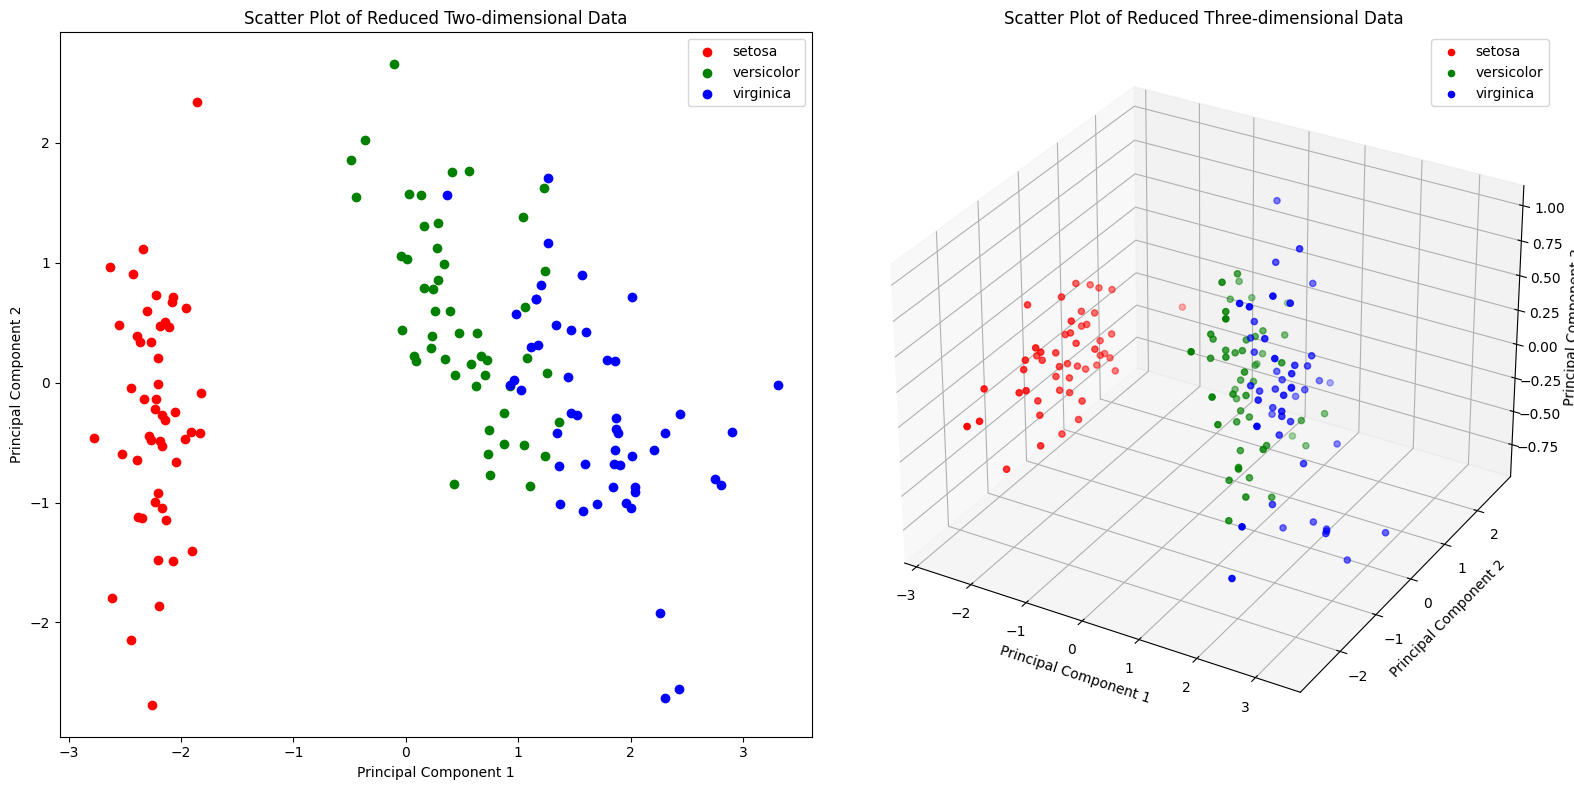

In [ ]:
plt.figure(figsize=(16, 8))

colors=['red','green','blue']

plt.subplot(1, 2, 1)
plt.scatter(reduced_two_dimension[data['species'] == 'setosa', 0], reduced_two_dimension[data['species'] == 'setosa', 1],color='red',label='setosa')
plt.legend()

plt.subplot(1, 2, 1)
plt.scatter(reduced_two_dimension[data['species'] == 'versicolor', 0], reduced_two_dimension[data['species'] == 'versicolor', 1],color='green', label='versicolor')
plt.legend()

plt.subplot(1, 2, 1)
plt.scatter(reduced_two_dimension[data['species'] == 'virginica', 0], reduced_two_dimension[data['species'] == 'virginica', 1],color='blue', label='virginica')
plt.legend()
plt.title('Scatter Plot of Reduced Two-dimensional Data')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')

ax=plt.subplot(1, 2, 2, projection='3d')
for i in range(len(species)):
  ax.scatter(reduced_three_dimension[data['species'] == species[i], 0], reduced_three_dimension[data['species'] == species[i], 1], reduced_three_dimension[data['species'] == species[i], 2], label=species[i], color=colors[i])
ax.legend()
ax.set_title('Scatter Plot of Reduced Three-dimensional Data')
ax.set_xlabel('Principal Component 1')
ax.set_ylabel('Principal Component 2')
ax.set_zlabel('Principal Component 3')

plt.tight_layout()
plt.show()